# Project: Why are patients missing their scheduled appointments?

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This project examines the "No-show appointments" dataset. This dataset containts information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. It indicates a number of different aspects of these appointments such as Scheduled date, Appointment date, demographic details, whether they received the appointment SMS, which ailment(s) they suffer from and whether they kept the appointment or not.

In [180]:
# import statements for all of the packages used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 'magic word' so that  visualizations are plotted
#   inline with the notebook. 
%matplotlib inline

We will be examining two primary research questions in this project:
1. Does receiving the SMS have a positive impact on people keeping their appointments? This is to see whether the SMS system is effective at getting patients to keep their appointments.
2. Is the appointment keeping rate same for different ailments of the patients? This is to understand whether there is a difference amongst the various ailments which leads to differences in appointment keeping rates. It is possible that some ailments may lead to patients not keeping their appointments more often and may need to be addressed.

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [181]:
# Loading the data
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

In [182]:
#checking the first 3 rows of the data
df.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [183]:
#checking the last 3 rows of the data
df.tail(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
110524,1.557663e+13,5630692,F,2016-04-27T16:03:52Z,2016-06-07T00:00:00Z,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,9.213493e+13,5630323,F,2016-04-27T15:09:23Z,2016-06-07T00:00:00Z,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,3.775115e+14,5629448,F,2016-04-27T13:30:56Z,2016-06-07T00:00:00Z,54,MARIA ORTIZ,0,0,0,0,0,1,No


In [184]:
#checking the datatypes of all the columns
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [185]:
#checking for rows with any null data
null_data = df[df.isnull().any(axis=1)]
null_data

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show


In [186]:
#checking the total number of duplicate rows in the dataset
sum(df.duplicated())

0

**Data Assessment Observations**

1. There is no null data in any row.
2. There are no duplicate rows.
3. There are some errors in names of columns, which are detailed in the Data Cleaning section below.
4. The datatypes for "ScheduledDay" and "AppointmentDay" are strings instead of datetime.
5. "No-show" column can be misleading since "No" here means that the patient came and kept the appointment and "Yes" means they didn't come for the appointment.
6. The column names are in Sentence case, which needs to be corrected to lower case.
7. There are a few column names with two words written as one continuous word.

Check the next section for detailed observations on data cleaning.


### Data Cleaning

**Data Cleaning Observations**

The following corrections are to be made in the datatypes:
- Datatype of columns "ScheduledDay" and "AppointmentDay" are to be changed from string (object) to datetime datatype.

We find that from the examination of the columns and the datatypes, the following corrections that need to be made in the names of the columns:
1. The name of "Hipertension" column is incorrect and is to be changed to "Hypertension".
2. The name of "Handcap" column is incorrect and is to be changed to "Handicap".
3. The name of "No-show" column is to be made more readable by changing it to "No_show".
4. The names of columns "PatientID", "AppointmentID", "ScheduledDay", "AppointmentDay" are to be made more readable by inserting underscore between the the two words.
5. All columns are to be made more readable by changing to lowercase letters.

To make the data more intuitive to understand, a new column is to be inserted in the dataframe called "came". This is to indicate whether the patient came for the appointment or not. This will be the opposite of "no_show". Where there is "Yes" in "no_show", there will be "No" in "came" and vice versa.

In [187]:
#changing datatypes of "ScheduledDay" and "AppointmentDay" to datetime datatype and checking data
df['ScheduledDay'] = df['ScheduledDay'].astype('datetime64')
df['AppointmentDay'] = df['AppointmentDay'].astype('datetime64')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [188]:
#renaming columns - "Hipertension", "Handcap", "No-show"
df.rename(columns = {'Hipertension':'Hypertension', 'Handcap':'Handicap', 'No-show':'No_show'}, inplace = True)
df.dtypes

PatientId                float64
AppointmentID              int64
Gender                    object
ScheduledDay      datetime64[ns]
AppointmentDay    datetime64[ns]
Age                        int64
Neighbourhood             object
Scholarship                int64
Hypertension               int64
Diabetes                   int64
Alcoholism                 int64
Handicap                   int64
SMS_received               int64
No_show                   object
dtype: object

In [189]:
#renaming columns - "PatientId", "AppointmentID", "ScheduledDay", "AppointmentDay"
df.rename(columns = {"PatientId":"Patient_Id", "AppointmentID":"Appointment_ID"}, inplace=True)
df.rename(columns = {"ScheduledDay":"Scheduled_Day", "AppointmentDay":"Appointment_Day"}, inplace=True)

In [190]:
#making all the column names lower case
df.rename(columns=lambda x: x.strip().lower(), inplace=True)

In [191]:
# adding new columng 'came' that is the opposite of 'no_show' & checking if all the column names are opposite
df['came'] = df.no_show.apply(lambda x: "Yes" if x == "No" else "No")
sum(df['no_show'] == df['came'])

0

In [192]:
#checking all datatypes of cleaned data
df.dtypes

patient_id                float64
appointment_id              int64
gender                     object
scheduled_day      datetime64[ns]
appointment_day    datetime64[ns]
age                         int64
neighbourhood              object
scholarship                 int64
hypertension                int64
diabetes                    int64
alcoholism                  int64
handicap                    int64
sms_received                int64
no_show                    object
came                       object
dtype: object

In [193]:
df.head(8)

,patient_id,appointment_id,gender,scheduled_day,appointment_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,came
0,2.987250e+13,5642903,F,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,Yes
1,5.589978e+14,5642503,M,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,Yes
2,4.262962e+12,5642549,F,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,Yes
3,8.679512e+11,5642828,F,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,Yes
4,8.841186e+12,5642494,F,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,Yes
5,9.598513e+13,5626772,F,2016-04-27 08:36:51,2016-04-29,76,REPÚBLICA,0,1,0,0,0,0,No,Yes
6,7.336882e+14,5630279,F,2016-04-27 15:05:12,2016-04-29,23,GOIABEIRAS,0,0,0,0,0,0,Yes,No
7,3.449833e+12,5630575,F,2016-04-27 15:39:58,2016-04-29,39,GOIABEIRAS,0,0,0,0,0,0,Yes,No


**Pre-EDA Notes**

The datatypes have been fixed and the column names have been cleaned up. There are no nulls or duplicates in the dataframe now. A new column 'came' has been added to make it easier to interpret. We are now ready for Exploratory Data Analysis.

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 - Does receiving the SMS have a positive impact on people keeping their appointments?

In our first research question, we examine whether the SMS system is effective in ensuring people keeping their appointments. In this section, we examine the percentage of people who received the SMS as well as the proportions of people who kept their appointments amongst those who received the SMS versus those who didn't.

In [194]:
#defining function to pull data on SMS receipt versus appointments kept 
#argument r determines whether SMS is received or not and can be 0 or 1
#argument c determines whether they came or didn't for the appointment and can be 'Yes' or 'No'
def sms(r,c):
    m = 100*(len(df[(df['sms_received'] == r) & (df['came'] == c)])/len(df[(df['sms_received'] == r)]))
    return m

In [195]:
#Checking Percentage of appointments that received SMS
sms_prop = 100*(len(df[df['sms_received'] ==1])/len(df))
sms_prop

32.10256317460892

In [196]:
# Calling the newly defined sms function to determine the percentage of people by 
# combinations of  receipt of the SMS and keeping of the appointment
rec_came = sms(1,"Yes")
rec_nocame = sms(1,"No")
norec_came = sms(0,"Yes")
norec_nocame = sms(0,"No")

In [197]:
# creating pivoted dataframe for plotting 100% stacked bar chart 
data = {'Came':[norec_came,rec_came], "Didn't come":[norec_nocame,rec_nocame]} 
  
# Creates pandas DataFrame for pivoted data
pivot_sms = pd.DataFrame(data, index =['No', 'Yes']) 
  
# print the data 
pivot_sms

,Came,Didn't come
No,83.296689,16.703311
Yes,72.425455,27.574545


**Observations about Research Question 1**

We see from the analysis that nearly a third (32.1%) of the appointments received the SMS. Of those who received the SMS, only 72.43% kept the appointment whereas of the  two-thirds who didn't receive an SMS, 83.29% kept the appointment. This is contraindicative showing a negative correlation between receiving SMS and keeping appointments. This requires further investigation of the data. For now, we plot this information as a 100% stacked bar chart to indicate the difference.

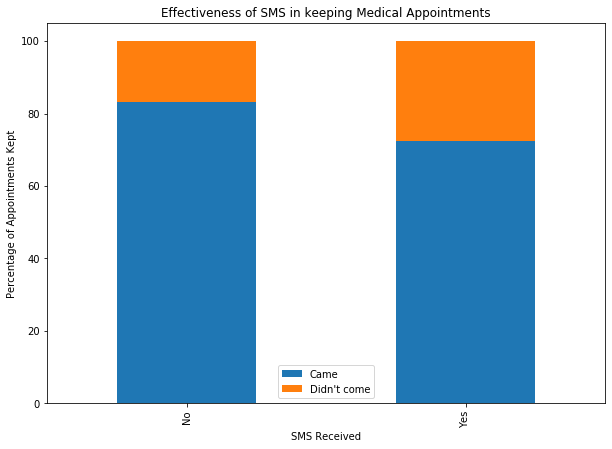

In [198]:
#100% stacked bar chart to show the impact of SMS on keeping the appointment
pivot_sms.plot.bar(stacked=True, figsize=(10,7))
plt.xlabel('SMS Received')
plt.ylabel('Percentage of Appointments Kept')
plt.title('Effectiveness of SMS in keeping Medical Appointments');

The stacked bar chart clearly shows the difference in percentage of appointments kept by people receiving the SMS versus those not - a clear 10%  difference. Further investigation is warranted to understand this phenomenon.

### Research Question 2  - Is the appointment keeping rate same for different ailments of the patients?

In our second reserch question, we analyse the relationship between the appointment keeping rate versus the different ailments that these patients have. This is to see whether people with certain specific ailments keep their appointments more or less often.


In [199]:
#defining function to pull data on ailments versus appointments kept 
#argument a determines which ailment column is being referred to
#argument c determines whether they came or didn't for the appointment and can be 'Yes' or 'No'
def ail(a,c):
    n = 100*(len(df[(df[a] == 1) & (df['came'] == c)])/len(df[(df[a] == 1)]))
    return n

In [200]:
#Using the ail function to determing the perentage of patients with
# each ailment that kept the appointment
hyp_yes = ail('hypertension','Yes')
diab_yes = ail('diabetes','Yes')
han_yes = ail('handicap','Yes')
alc_yes = ail('alcoholism','Yes')
values = [hyp_yes, diab_yes, han_yes, alc_yes]
values

[82.69804137424889, 81.99672667757774, 82.07639569049951, 79.85119047619048]

**Observations about Research Question 2**

From the analysis, we see that for the appointment keeping rate hovers around 82% for Hypertension (82.70%), Diabetes (82.0%) and Handicaps (82.08%) with Hypertension being on the higher side compared to the other two. But for Alcoholism, it is lower at 79.85%, possibly indicating a connection between the condition and the tendency to skip appointments more than other ailments. This requires further investigation and analysis. We will demonstrate this difference through a line plot to demarcate the difference between Alcoholism against the other ailments.


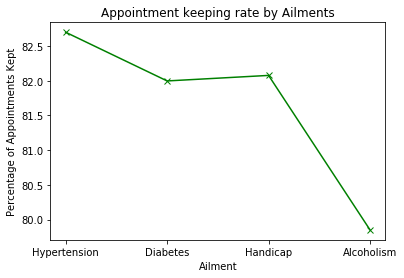

In [201]:
locations=[1,2,3,4]
labels = ['Hypertension', 'Diabetes', 'Handicap', 'Alcoholism']
plt.plot(locations, values, color='green', marker='x')
plt.xticks(locations,labels)
plt.xlabel('Ailment')
plt.ylabel('Percentage of Appointments Kept')
plt.title('Appointment keeping rate by Ailments');

The line chart clearly shows the difference in percentage of appointments kept versus the various reported ailments.

### Research Question 3  - What is the correlation between age and keeping of appointments?

In the third reserch question, we analyse the relationship between the appointment keeping rate versus the age of the patients, this is to see whether the tendency to keep appointments varies with age.

In [202]:
#Aggregating the count of number of people who kept their appointment or not, grouped by age
age_counts = df.groupby(by=['age','came'], as_index=False).count()

#Checking the first several rows to check for outliers
age_counts.head(11)

,age,came,patient_id,appointment_id,gender,scheduled_day,appointment_day,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,-1,Yes,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,No,639,639,639,639,639,639,639,639,639,639,639,639,639
2,0,Yes,2900,2900,2900,2900,2900,2900,2900,2900,2900,2900,2900,2900,2900
3,1,No,415,415,415,415,415,415,415,415,415,415,415,415,415
4,1,Yes,1858,1858,1858,1858,1858,1858,1858,1858,1858,1858,1858,1858,1858
5,2,No,252,252,252,252,252,252,252,252,252,252,252,252,252
6,2,Yes,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366,1366
7,3,No,277,277,277,277,277,277,277,277,277,277,277,277,277
8,3,Yes,1236,1236,1236,1236,1236,1236,1236,1236,1236,1236,1236,1236,1236
9,4,No,282,282,282,282,282,282,282,282,282,282,282,282,282


In [203]:
#Checking the last few rows to check for outliers
age_counts.tail(11)

,age,came,patient_id,appointment_id,gender,scheduled_day,appointment_day,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
193,96,No,1,1,1,1,1,1,1,1,1,1,1,1,1
194,96,Yes,16,16,16,16,16,16,16,16,16,16,16,16,16
195,97,No,2,2,2,2,2,2,2,2,2,2,2,2,2
196,97,Yes,9,9,9,9,9,9,9,9,9,9,9,9,9
197,98,No,1,1,1,1,1,1,1,1,1,1,1,1,1
198,98,Yes,5,5,5,5,5,5,5,5,5,5,5,5,5
199,99,Yes,1,1,1,1,1,1,1,1,1,1,1,1,1
200,100,Yes,4,4,4,4,4,4,4,4,4,4,4,4,4
201,102,Yes,2,2,2,2,2,2,2,2,2,2,2,2,2
202,115,No,3,3,3,3,3,3,3,3,3,3,3,3,3


In [204]:
#Removing the outliers (1st row, last 5 rows) & removing unwanted columns
age_cleaned = age_counts.iloc[1:-5,0:3]
age_cleaned

,age,came,patient_id
1,0,No,639
2,0,Yes,2900
3,1,No,415
4,1,Yes,1858
5,2,No,252
...,...,...,...
194,96,Yes,16
195,97,No,2
196,97,Yes,9
197,98,No,1


In [205]:
#Pivoting the age data to make it more readable and for calculating percentages and plotting
age_pivot = age_cleaned.pivot(index='age', columns='came', values='patient_id')
age_pivot.reset_index(inplace=True)
age_pivot.head()

came,age,No,Yes
0,0,639,2900
1,1,415,1858
2,2,252,1366
3,3,277,1236
4,4,282,1017


In [206]:
#Calculating the percentage of people at each age that skipped their appointments
age_pivot['skipped_percent']=100*(age_pivot['No'])/(age_pivot['No']+age_pivot['Yes'])
age_pivot.head()

came,age,No,Yes,skipped_percent
0,0,639,2900,18.055948
1,1,415,1858,18.257809
2,2,252,1366,15.574784
3,3,277,1236,18.307997
4,4,282,1017,21.709007


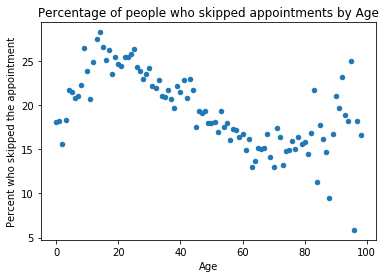

In [207]:
#scatter plot between age and percentage of each age that skipped the appointment
age_pivot.plot.scatter(x = 'age', y = 'skipped_percent')
plt.xlabel('Age')
plt.ylabel('Percent who skipped the appointment')
plt.title('Percentage of people who skipped appointments by Age');

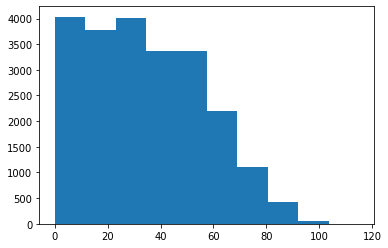

In [208]:
#examining the distribution by age of people who skipped appointments
age_dist = df.query('came == "No"')
plt.hist(age_dist['age'], bins=10);

**Observations about Research Question 3**

From the scatterplot, we can see the variation of those skipping the appointment by age. We see that the rate of skipping the appointment rises steeply from infancy of the patients (close to 15%) till teens and almost till age 20 (nearly 30%), indicating a positive correlation. From age 20 till age 60, the rate falls consistently from 30% to below 15% in an highly negative linear correlation. Post this age, the effect of age is erratic though there is a slight positive linearity in the correlation. Also, from the histogram, we observe that the largest chunk of patients who skip are in the age bracket 0-30 years, consistent with our findings.

<a id='conclusions'></a>
## Conclusions


1. The analysis around Research question 1 about whether receiving the SMS would positively impact keeping the appointment showed a negative result. The analysis showed that when people received the SMS, they were less likely to keep the appointment. Of the nearly one-third of the appointments that received the SMS, only 72.43% kept the appointment whereas of the two-thirds who didn't receive an SMS, 83.29% kept the appointment. This seems counter-intuitive since one would assume that if you received the SMS, you were more likely to keep the appointment. This result does not necessarily mean that the SMS system fails since there might be other features of the data that might reveal information to help us understand it better. It clearly indicates a need to further investigate the data.

2. The second Research question revealed that of the four ailments, people with Hypertension are most likely to keep their appointment. People with Diabates and Handicaps fall shortly behind. But those with Alcoholism are significantly less likely to keep their appointments. While this may not be necessarily because of the ailment itself, the difference is large enough to necessitate further analysis and possibly getting more data on this segment to understand the reasons behind this observation.

3. The rate of skipping the appointment increases as the age of the patients varies from infancy (nearly 15%) till age 20 (nearly 30%), indicating a positive correlation. This means that from age 1 till age 20, more appointments are skipped as age increases. From age 20 till age 60, the rate falls almost linearly from 30% to below 15%. Meaning that from age 20 to 60, as ages increases, more people keep their appointments. Past 60, the effect of age is not as correlated but slightly positively correlated with rate of skipping appointments.

**Limitations**:
The analysis and conclusions presented above must be considered with the following limitations in mind.
1. For the analyses performed, it is not clear if the data is error-free. Especially since there is a contraindicative result of the analysis showing that those who received the SMS were less likely on average to keep their appointments. It is not clear if the SMS data is complete or accurate.
2. With regards to the analyis of the appointment keeping rates against the different ailments, it must be noted there are cases, where there are people with multiple ailments. It was decided not to include/exclude these data points since the percentage of such instances is small. But this might have an impact on the analysis and the resulting conclusions.
3. The third research question was analysed by choosing the percentage of patients of each age who skipped the appointment rather than the distribution of the patients who skipped by age. This would show correlation with appointment keeping rates but might give spurious results.